In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy import stats as st
from modules.kuramoto import Kuramoto
from modules.plotting import plot_activity, plot_phase_coherence

n_osc = 10
coupl = 2

## frecuencias naturales usando la distribución de cauchy
normal_dist = st.norm(loc=100, scale=1)
natfreqs_sample = normal_dist.rvs(size=n_osc)

#natfreqs_sample = [1,2,5,100]
labeldict = {i:e for i, e in enumerate(np.floor(natfreqs_sample))}

graph_nx = nx.erdos_renyi_graph(n=n_osc, p=1) # p=1 -> all-to-all connectivity
graph = nx.to_numpy_array(graph_nx)

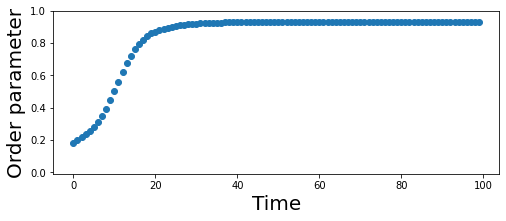

In [ ]:
model = Kuramoto(coupling=coupl, dt=0.1, T=10, natfreqs=natfreqs_sample, forcing_amp=1, forcing_freq=555) 
act_mat = model.run(adj_mat=graph)

plot_phase_coherence(act_mat);

In [ ]:
model = Kuramoto(coupling=3, dt=0.1, T=10, natfreqs=natfreqs_sample) 
act_mat = model.run(adj_mat=graph)

model.derivative(act_mat[:,0], None, graph, coupl)
model.mean_frequency(act_mat, graph, coupl)

TypeError: mean_frequency() takes 3 positional arguments but 4 were given

In [ ]:
graph.shape

(10, 10)